## Project: Time Series Analysis on temperature for all data from 1876-2022

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")


# Import the relevant sklearn packages
from statsmodels.api import OLS, add_constant
from sklearn.datasets import fetch_california_housing

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer


from sklearn.metrics import (
    mean_squared_error,
    r2_score, mean_squared_log_error,
     mean_absolute_error, 
)

from sklearn.metrics import r2_score


from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression

# Set figure size to (14,6)
plt.rcParams['figure.figsize'] = (14,6)
plt.rcParams['font.size'] = '14'

# Regularized linear models
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_squared_log_error

# Easy way to get rid of warnings:
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestRegressor

In [76]:
df= pd.read_csv('TG_STAID002759.csv',sep=',',skiprows=19, parse_dates=True, index_col=1, skipinitialspace=True)
df

SOUID   TG  Q_TG
DATE                         
1876-01-01  127488   22     0
1876-01-02  127488   25     0
1876-01-03  127488    3     0
1876-01-04  127488  -58     0
1876-01-05  127488  -98     0
...            ...  ...   ...
2022-12-27  111448   42     0
2022-12-28  111448   63     0
2022-12-29  111448  100     0
2022-12-30  111448   76     0
2022-12-31  111448  148     0

[53691 rows x 3 columns]

In [81]:
df = df.drop(['SOUID', 'Q_TG'], axis=1)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53691 entries, 1876-01-01 to 2022-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   TG      53691 non-null  int64
dtypes: int64(1)
memory usage: 838.9 KB


In [83]:
df.shape

(53691, 1)

In [88]:
df.loc[:] *=0.1

In [84]:
# df.loc[:,'TG'] * 0.1

In [89]:
df

TG
DATE            
1876-01-01   2.2
1876-01-02   2.5
1876-01-03   0.3
1876-01-04  -5.8
1876-01-05  -9.8
...          ...
2022-12-27   4.2
2022-12-28   6.3
2022-12-29  10.0
2022-12-30   7.6
2022-12-31  14.8

[53691 rows x 1 columns]

### Train-Validation split

In [90]:
df_train = df_tran[:-365]

df_test = df_tran[-365:]

In [57]:
# Xtrain, Xval, ytrain, yval= train_test_split(X,y, test_size=.25,random_state=34)

In [58]:
# Xtrain.shape, Xval.shape, ytrain.shape, yval.shape

In [59]:
# df_train = pd.concat([Xtrain,ytrain], axis=1)

In [60]:
# Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=.2, random_state=420)

### EDA

<AxesSubplot: xlabel='DATE'>

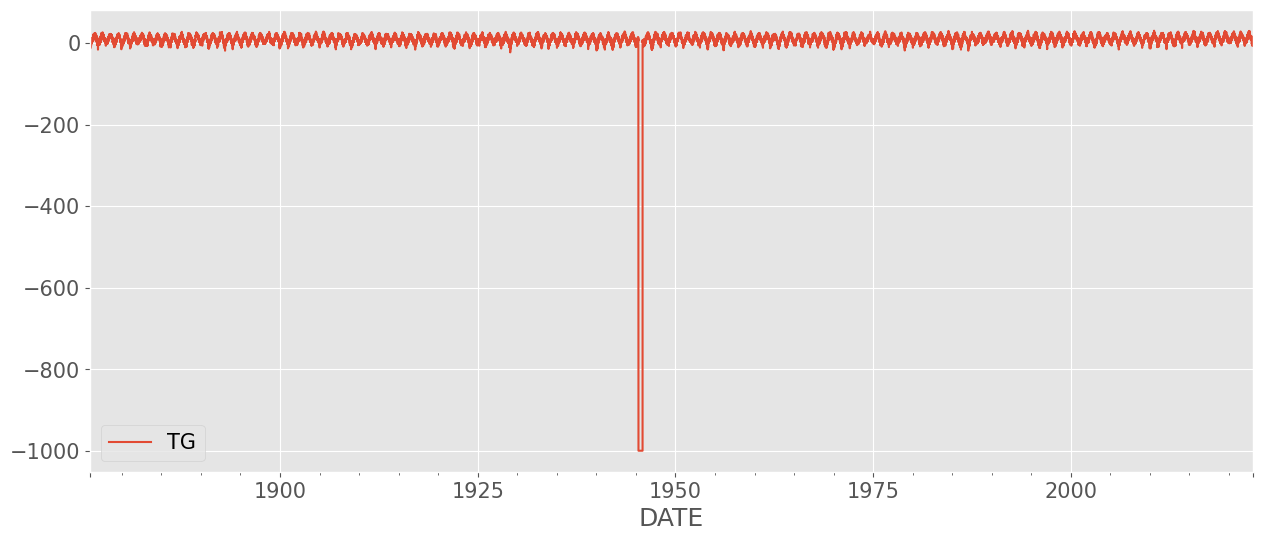

In [91]:
df.plot()

In [92]:
df.loc["24 April 1945":"5 November 1945"] = (df.loc["24 April 1944":"5 November 1944"].values + df.loc["24 April 1946":"5 November 1946"].values)/2

<AxesSubplot: xlabel='DATE'>

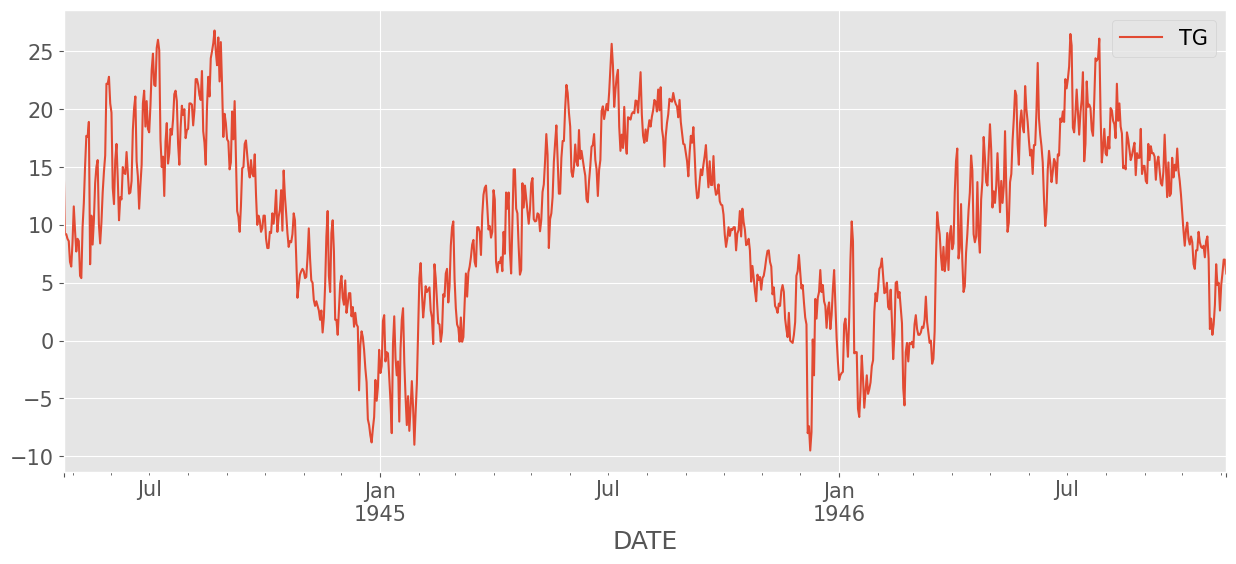

In [93]:
df.loc["24 April 1944":"5 November 1946"].plot()

In [94]:
df.describe()

TG
count  53691.000000
mean       9.432401
std        7.877805
min      -22.600000
25%        3.400000
50%        9.400000
75%       15.800000
max       30.500000

In [95]:
df.isna().sum()

TG    0
dtype: int64

In [96]:
def plot_meantemp(df, title='Daily mean temperature since 1876', ylim=True):
    df.plot()
    plt.title(title)
    plt.ylabel('# of mean temperature in C')
    if ylim:
        plt.ylim(ymin=0)
    plt.show()

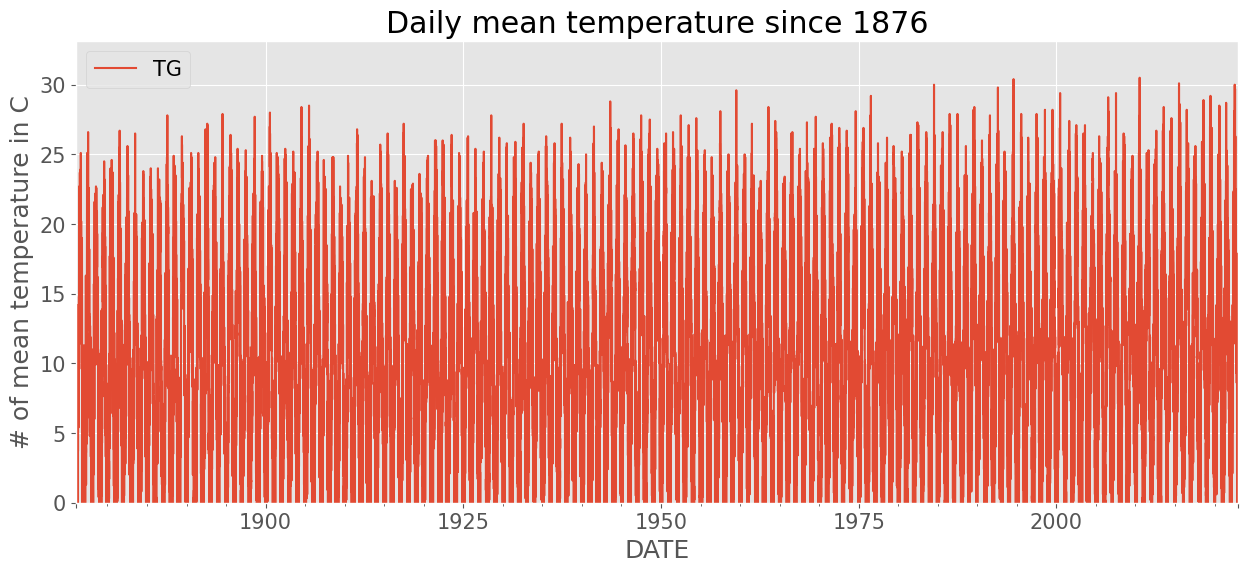

In [97]:
plot_meantemp(df)

In [99]:
### Model the trend

In [98]:
list(range(len(df)))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [101]:
# Create a monthly column for the trend
df['month'] = df.index.month
df.head()

TG  month
DATE                  
1876-01-01  2.2      1
1876-01-02  2.5      1
1876-01-03  0.3      1
1876-01-04 -5.8      1
1876-01-05 -9.8      1

In [102]:
# Create a timestep variable
df['timestep'] = list(range(len(df)))
df.head()

TG  month  timestep
DATE                            
1876-01-01  2.2      1         0
1876-01-02  2.5      1         1
1876-01-03  0.3      1         2
1876-01-04 -5.8      1         3
1876-01-05 -9.8      1         4

In [103]:
df.columns

Index(['TG', 'month', 'timestep'], dtype='object')

In [104]:
# Run a Linear Regression
m = LinearRegression()
X = df[['timestep']]
y = df.TG
m.fit(X, y)

LinearRegression()

In [105]:
### Plot the trend and the original data

In [106]:
# Use the model to make a prediction
df['trend'] = m.predict(X)
df.head(15)

TG  month  timestep     trend
DATE                                       
1876-01-01   2.2      1         0  8.507200
1876-01-02   2.5      1         1  8.507234
1876-01-03   0.3      1         2  8.507269
1876-01-04  -5.8      1         3  8.507303
1876-01-05  -9.8      1         4  8.507338
1876-01-06  -7.7      1         5  8.507372
1876-01-07  -6.6      1         6  8.507407
1876-01-08  -8.9      1         7  8.507441
1876-01-09 -12.7      1         8  8.507476
1876-01-10  -8.9      1         9  8.507510
1876-01-11  -6.2      1        10  8.507544
1876-01-12  -4.6      1        11  8.507579
1876-01-13  -3.5      1        12  8.507613
1876-01-14  -3.6      1        13  8.507648
1876-01-15  -3.1      1        14  8.507682

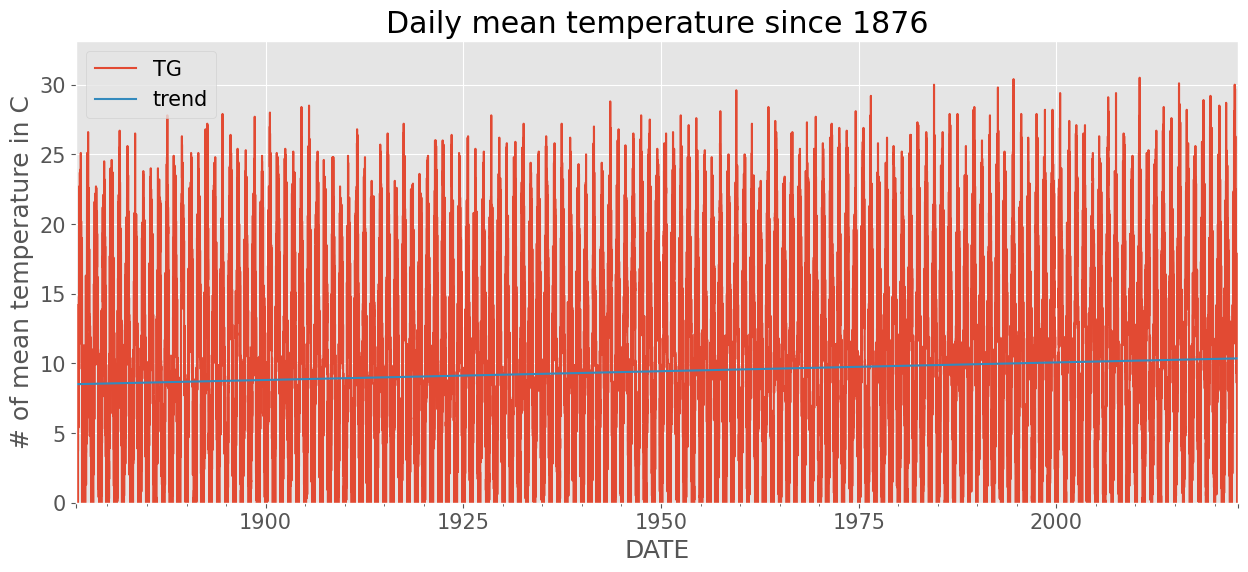

In [108]:
plot_meantemp(df[['TG', 'trend']])

In [109]:
import plotly.express as px
px.scatter(df[['TG','trend']])

In [110]:
m.intercept_,m.coef_

(8.507199844754425, array([3.44645671e-05]))

In [111]:
## Model the seasonality

In [112]:
pd.get_dummies(df.month,prefix='month')

month_1  month_2  month_3  month_4  month_5  month_6  month_7  \
DATE                                                                        
1876-01-01        1        0        0        0        0        0        0   
1876-01-02        1        0        0        0        0        0        0   
1876-01-03        1        0        0        0        0        0        0   
1876-01-04        1        0        0        0        0        0        0   
1876-01-05        1        0        0        0        0        0        0   
...             ...      ...      ...      ...      ...      ...      ...   
2022-12-27        0        0        0        0        0        0        0   
2022-12-28        0        0        0        0        0        0        0   
2022-12-29        0        0        0        0        0        0        0   
2022-12-30        0        0        0        0        0        0        0   
2022-12-31        0        0        0        0        0        0        0   

            month_8  month_9  month_10  month_11  month_12  
DATE                                                        
1876-01-01        0        0         0         0         0  
1876-01-02        0        0         0         0         0  
1876-01-03        0        0         0         0         0  
1876-01-04        0        0         0         0         0  
1876-01-05        0        0         0         0         0  
...             ...      ...       ...       ...       ...  
2022-12-27        0        0         0         0         1  
2022-12-28        0        0         0         0         1  
2022-12-29        0        0         0         0         1  
2022-12-30        0        0         0         0         1  
2022-12-31        0        0         0         0         1  

[53691 rows x 12 columns]

In [113]:
# One-Hot-Encoding the month
seasonal_dummies = pd.get_dummies(df.month,prefix='month')
# sklearn.preprocessing.OneHotEncoder

df = df.join(seasonal_dummies)

In [114]:
df.head()

TG  month  timestep     trend  month_1  month_2  month_3  \
DATE                                                                    
1876-01-01  2.2      1         0  8.507200        1        0        0   
1876-01-02  2.5      1         1  8.507234        1        0        0   
1876-01-03  0.3      1         2  8.507269        1        0        0   
1876-01-04 -5.8      1         3  8.507303        1        0        0   
1876-01-05 -9.8      1         4  8.507338        1        0        0   

            month_4  month_5  month_6  month_7  month_8  month_9  month_10  \
DATE                                                                         
1876-01-01        0        0        0        0        0        0         0   
1876-01-02        0        0        0        0        0        0         0   
1876-01-03        0        0        0        0        0        0         0   
1876-01-04        0        0        0        0        0        0         0   
1876-01-05        0        0        0        0        0        0         0   

            month_11  month_12  
DATE                            
1876-01-01         0         0  
1876-01-02         0         0  
1876-01-03         0         0  
1876-01-04         0         0  
1876-01-05         0         0

In [115]:
# Define X and y
X = df.drop(columns=['TG', 'month', 'trend'])

In [116]:
X

timestep  month_1  month_2  month_3  month_4  month_5  month_6  \
DATE                                                                         
1876-01-01         0        1        0        0        0        0        0   
1876-01-02         1        1        0        0        0        0        0   
1876-01-03         2        1        0        0        0        0        0   
1876-01-04         3        1        0        0        0        0        0   
1876-01-05         4        1        0        0        0        0        0   
...              ...      ...      ...      ...      ...      ...      ...   
2022-12-27     53686        0        0        0        0        0        0   
2022-12-28     53687        0        0        0        0        0        0   
2022-12-29     53688        0        0        0        0        0        0   
2022-12-30     53689        0        0        0        0        0        0   
2022-12-31     53690        0        0        0        0        0        0   

            month_7  month_8  month_9  month_10  month_11  month_12  
DATE                                                                 
1876-01-01        0        0        0         0         0         0  
1876-01-02        0        0        0         0         0         0  
1876-01-03        0        0        0         0         0         0  
1876-01-04        0        0        0         0         0         0  
1876-01-05        0        0        0         0         0         0  
...             ...      ...      ...       ...       ...       ...  
2022-12-27        0        0        0         0         0         1  
2022-12-28        0        0        0         0         0         1  
2022-12-29        0        0        0         0         0         1  
2022-12-30        0        0        0         0         0         1  
2022-12-31        0        0        0         0         0         1  

[53691 rows x 13 columns]

In [117]:
y

DATE
1876-01-01     2.2
1876-01-02     2.5
1876-01-03     0.3
1876-01-04    -5.8
1876-01-05    -9.8
              ... 
2022-12-27     4.2
2022-12-28     6.3
2022-12-29    10.0
2022-12-30     7.6
2022-12-31    14.8
Name: TG, Length: 53691, dtype: float64

In [118]:
m.fit(X, y)

LinearRegression()

In [119]:
# Create a model with trend and seasonality
df['trend_seasonal'] = m.predict(X)
df.head()

TG  month  timestep     trend  month_1  month_2  month_3  \
DATE                                                                    
1876-01-01  2.2      1         0  8.507200        1        0        0   
1876-01-02  2.5      1         1  8.507234        1        0        0   
1876-01-03  0.3      1         2  8.507269        1        0        0   
1876-01-04 -5.8      1         3  8.507303        1        0        0   
1876-01-05 -9.8      1         4  8.507338        1        0        0   

            month_4  month_5  month_6  month_7  month_8  month_9  month_10  \
DATE                                                                         
1876-01-01        0        0        0        0        0        0         0   
1876-01-02        0        0        0        0        0        0         0   
1876-01-03        0        0        0        0        0        0         0   
1876-01-04        0        0        0        0        0        0         0   
1876-01-05        0        0        0        0        0        0         0   

            month_11  month_12  trend_seasonal  
DATE                                            
1876-01-01         0         0       -0.882471  
1876-01-02         0         0       -0.882438  
1876-01-03         0         0       -0.882404  
1876-01-04         0         0       -0.882370  
1876-01-05         0         0       -0.882336

In [120]:
### Plot the original data and the trend

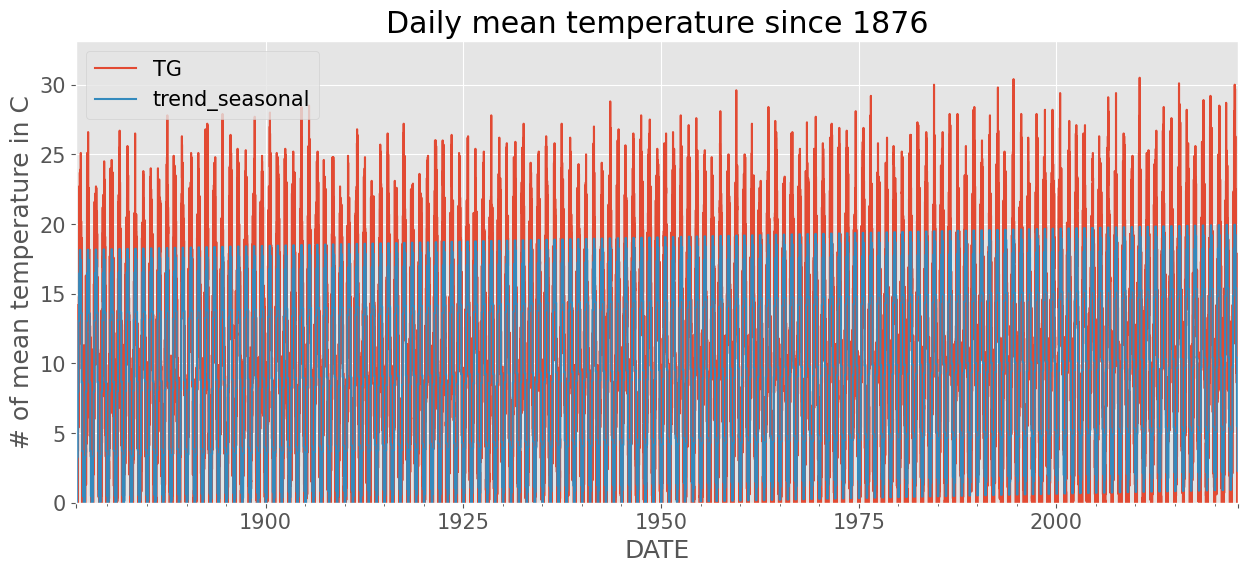

In [122]:
plot_meantemp(df[['TG', 'trend_seasonal']])

In [123]:
### Extract the remainder

In [124]:
df

TG  month  timestep      trend  month_1  month_2  month_3  \
DATE                                                                      
1876-01-01   2.2      1         0   8.507200        1        0        0   
1876-01-02   2.5      1         1   8.507234        1        0        0   
1876-01-03   0.3      1         2   8.507269        1        0        0   
1876-01-04  -5.8      1         3   8.507303        1        0        0   
1876-01-05  -9.8      1         4   8.507338        1        0        0   
...          ...    ...       ...        ...      ...      ...      ...   
2022-12-27   4.2     12     53686  10.357465        0        0        0   
2022-12-28   6.3     12     53687  10.357499        0        0        0   
2022-12-29  10.0     12     53688  10.357534        0        0        0   
2022-12-30   7.6     12     53689  10.357568        0        0        0   
2022-12-31  14.8     12     53690  10.357602        0        0        0   

            month_4  month_5  month_6  month_7  month_8  month_9  month_10  \
DATE                                                                         
1876-01-01        0        0        0        0        0        0         0   
1876-01-02        0        0        0        0        0        0         0   
1876-01-03        0        0        0        0        0        0         0   
1876-01-04        0        0        0        0        0        0         0   
1876-01-05        0        0        0        0        0        0         0   
...             ...      ...      ...      ...      ...      ...       ...   
2022-12-27        0        0        0        0        0        0         0   
2022-12-28        0        0        0        0        0        0         0   
2022-12-29        0        0        0        0        0        0         0   
2022-12-30        0        0        0        0        0        0         0   
2022-12-31        0        0        0        0        0        0         0   

            month_11  month_12  trend_seasonal  
DATE                                            
1876-01-01         0         0       -0.882471  
1876-01-02         0         0       -0.882438  
1876-01-03         0         0       -0.882404  
1876-01-04         0         0       -0.882370  
1876-01-05         0         0       -0.882336  
...              ...       ...             ...  
2022-12-27         0         1        2.269263  
2022-12-28         0         1        2.269297  
2022-12-29         0         1        2.269330  
2022-12-30         0         1        2.269364  
2022-12-31         0         1        2.269398  

[53691 rows x 17 columns]

In [126]:
# We want to extract the part of the model that the trend_seasonal is not able to explain
df['remainder'] = df.TG - df.trend_seasonal

In [127]:
df.head()

TG  month  timestep     trend  month_1  month_2  month_3  \
DATE                                                                    
1876-01-01  2.2      1         0  8.507200        1        0        0   
1876-01-02  2.5      1         1  8.507234        1        0        0   
1876-01-03  0.3      1         2  8.507269        1        0        0   
1876-01-04 -5.8      1         3  8.507303        1        0        0   
1876-01-05 -9.8      1         4  8.507338        1        0        0   

            month_4  month_5  month_6  month_7  month_8  month_9  month_10  \
DATE                                                                         
1876-01-01        0        0        0        0        0        0         0   
1876-01-02        0        0        0        0        0        0         0   
1876-01-03        0        0        0        0        0        0         0   
1876-01-04        0        0        0        0        0        0         0   
1876-01-05        0        0        0        0        0        0         0   

            month_11  month_12  trend_seasonal  remainder  
DATE                                                       
1876-01-01         0         0       -0.882471   3.082471  
1876-01-02         0         0       -0.882438   3.382438  
1876-01-03         0         0       -0.882404   1.182404  
1876-01-04         0         0       -0.882370  -4.917630  
1876-01-05         0         0       -0.882336  -8.917664

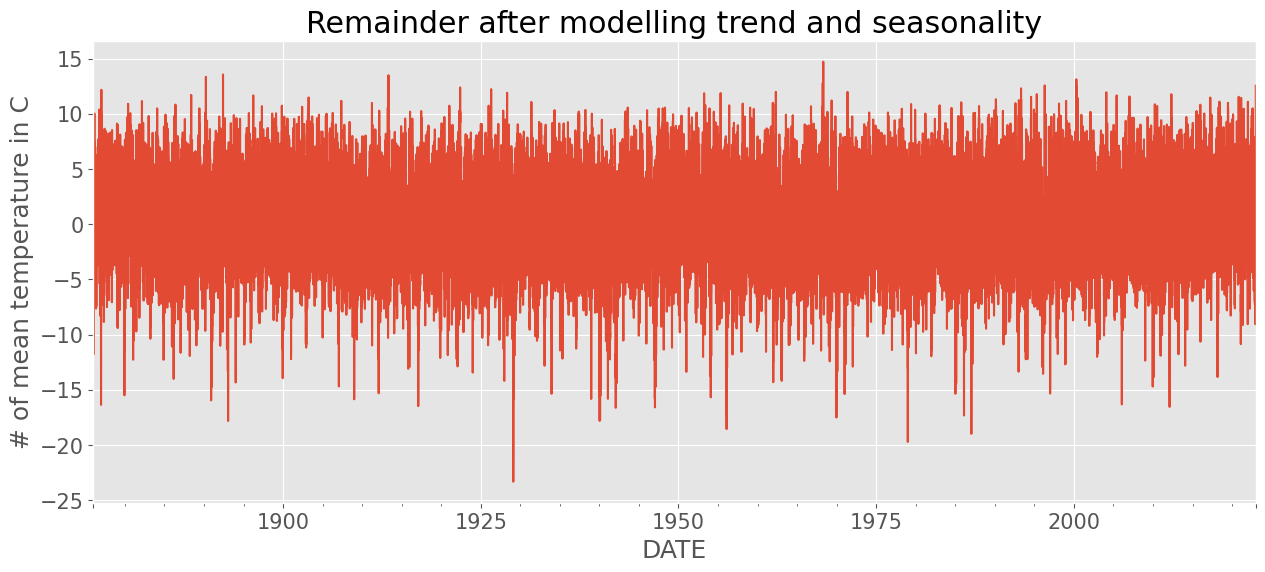

In [128]:
plot_meantemp(df['remainder'], title='Remainder after modelling trend and seasonality', ylim=False)

In [129]:
df['remainder'].mean(), df.remainder.std()

(-1.2034601708514296e-15, 3.9246793865678447)

In [131]:
random_array = np.random.normal(loc=0, scale=10, size=53691)
df['random'] = random_array

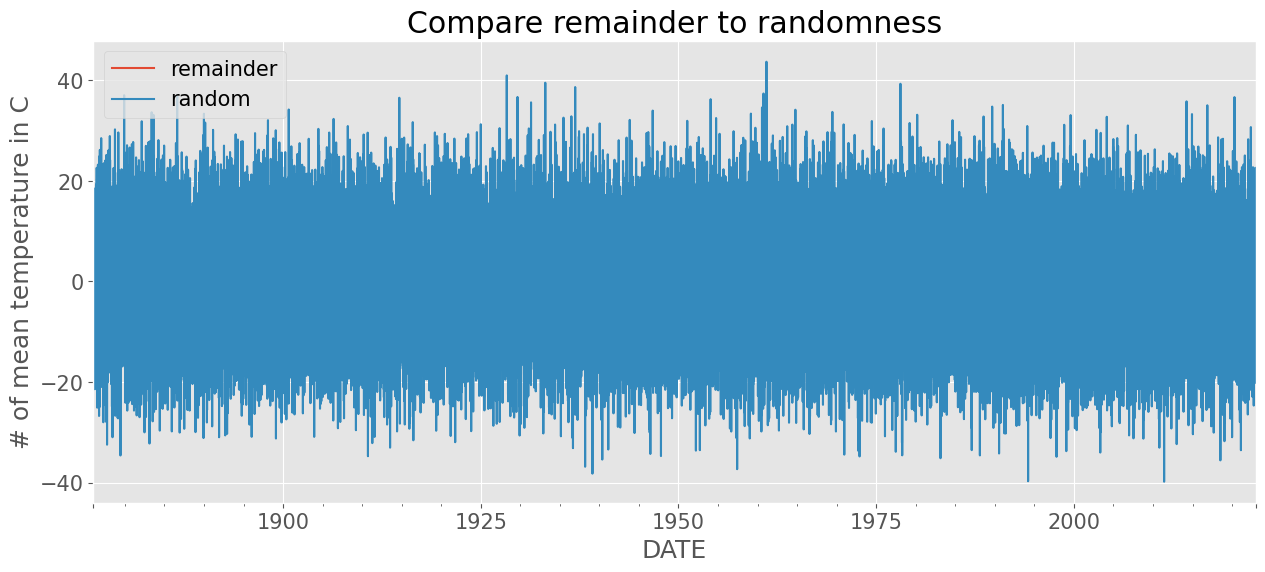

In [132]:
plot_meantemp(df[['remainder', 'random']], title='Compare remainder to randomness', ylim=False)

In [134]:
df['remainder'].to_csv('temperature_remainder.csv')

In [135]:
df_rem = pd.read_csv('temperature_remainder.csv', index_col=0, parse_dates=True)
df_rem.head()

remainder
DATE                 
1876-01-01   3.082471
1876-01-02   3.382438
1876-01-03   1.182404
1876-01-04  -4.917630
1876-01-05  -8.917664

In [136]:
# Plot the data
def plot_remainder(df_rem, title='Remaining Temperature after Extracting Trend and Seasonality'):
    df_rem.plot()
    plt.title(title)
    plt.ylabel('# of mean temperature in C')
    plt.show()

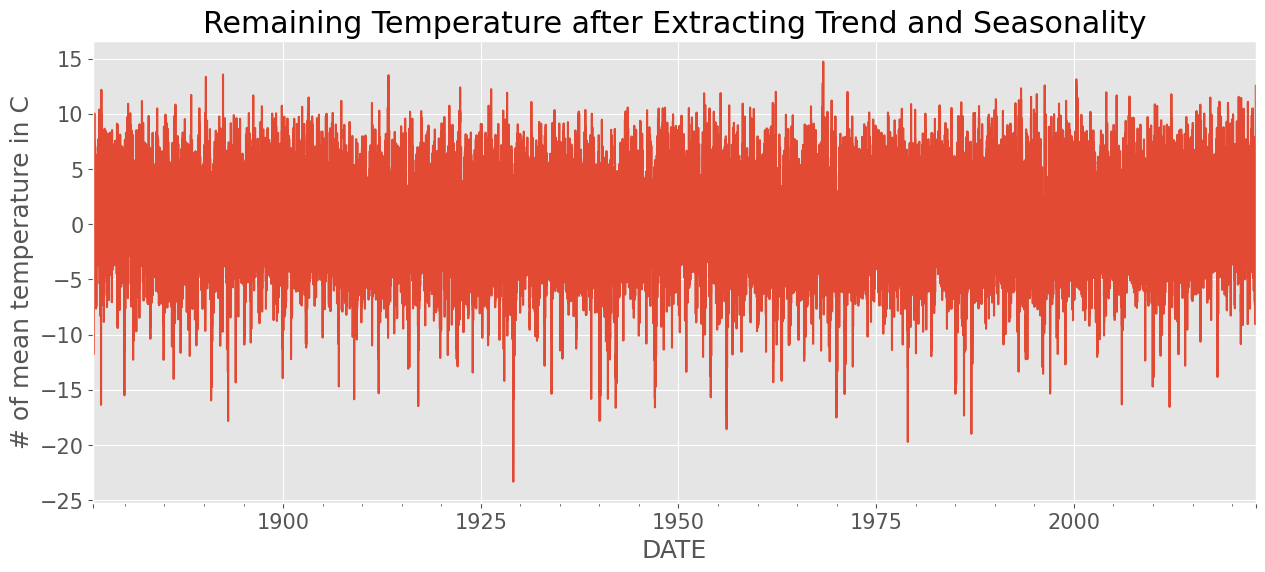

In [137]:
plot_remainder(df_rem['remainder'])

In [138]:
### Create a time-lagged input feature: lag1

In [139]:
df_rem

remainder
DATE                 
1876-01-01   3.082471
1876-01-02   3.382438
1876-01-03   1.182404
1876-01-04  -4.917630
1876-01-05  -8.917664
...               ...
2022-12-27   1.930737
2022-12-28   4.030703
2022-12-29   7.730670
2022-12-30   5.330636
2022-12-31  12.530602

[53691 rows x 1 columns]

In [140]:
df_rem['lag1'] = df_rem['remainder'].shift(1)

df_rem

remainder      lag1
DATE                           
1876-01-01   3.082471       NaN
1876-01-02   3.382438  3.082471
1876-01-03   1.182404  3.382438
1876-01-04  -4.917630  1.182404
1876-01-05  -8.917664 -4.917630
...               ...       ...
2022-12-27   1.930737  7.230771
2022-12-28   4.030703  1.930737
2022-12-29   7.730670  4.030703
2022-12-30   5.330636  7.730670
2022-12-31  12.530602  5.330636

[53691 rows x 2 columns]

In [141]:
df_rem.corr()

remainder      lag1
remainder   1.000000  0.803825
lag1        0.803825  1.000000

In [142]:
### Plot remainder against lag1

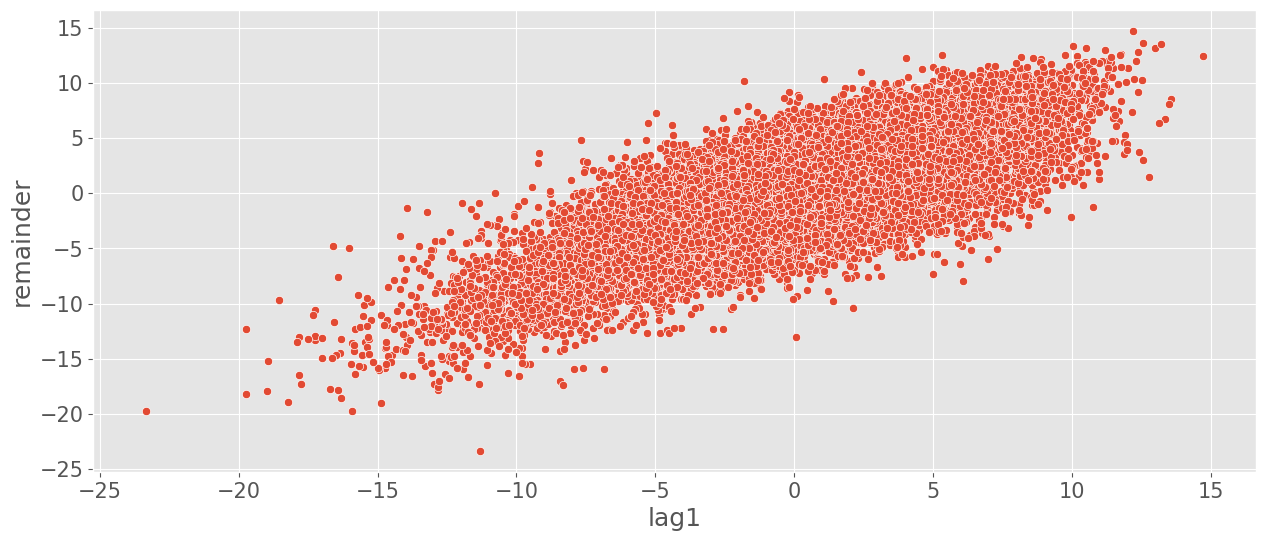

In [143]:
sns.scatterplot(x='lag1', y='remainder', data=df_rem);

In [144]:
### Run an Autoregression (Linear Regression) of lag1 on the remainder

In [145]:
# Drop missing values
df_rem.dropna(inplace=True)
df_rem.head()

remainder      lag1
DATE                           
1876-01-02   3.382438  3.082471
1876-01-03   1.182404  3.382438
1876-01-04  -4.917630  1.182404
1876-01-05  -8.917664 -4.917630
1876-01-06  -6.817698 -8.917664

In [146]:
# Assign X and y
X = df_rem[['lag1']]
y = df_rem['remainder']

In [147]:
# Create and fit the model
m = LinearRegression()
m.fit(X, y)

LinearRegression()

In [148]:
# Create predictions
df_rem['predictions_ar1'] = m.predict(X)
df_rem.head()

remainder      lag1  predictions_ar1
DATE                                            
1876-01-02   3.382438  3.082471         2.478118
1876-01-03   1.182404  3.382438         2.719259
1876-01-04  -4.917630  1.182404         0.950660
1876-01-05  -8.917664 -4.917630        -3.953134
1876-01-06  -6.817698 -8.917664        -7.168747

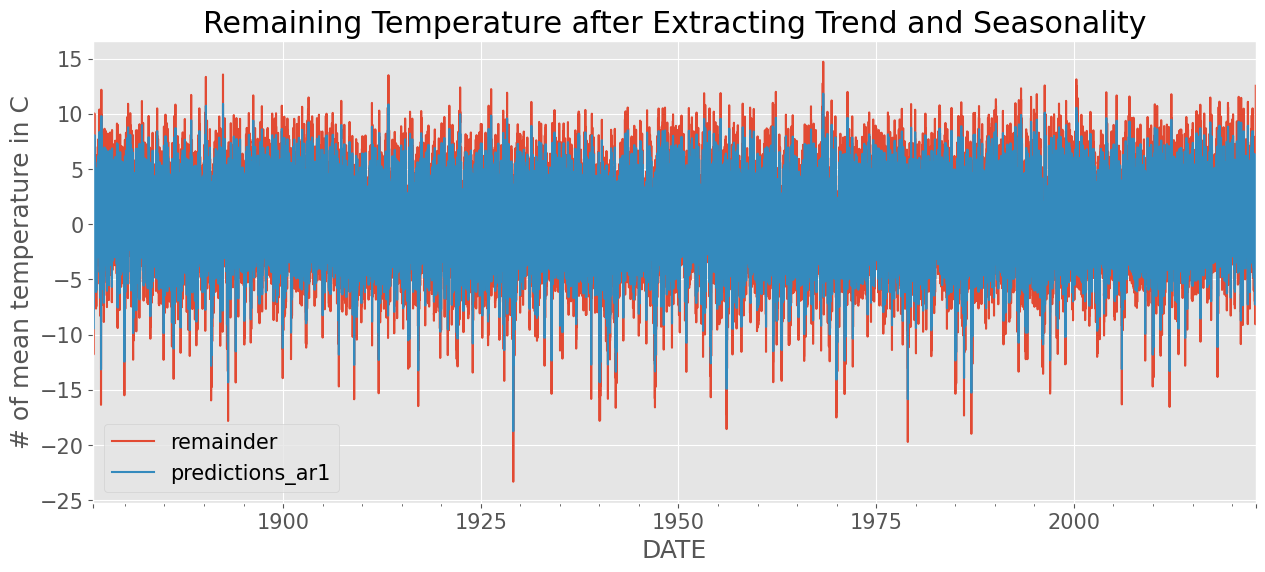

In [149]:
# Plot the original remainder and the prediction
plot_remainder(df_rem[['remainder', 'predictions_ar1']])

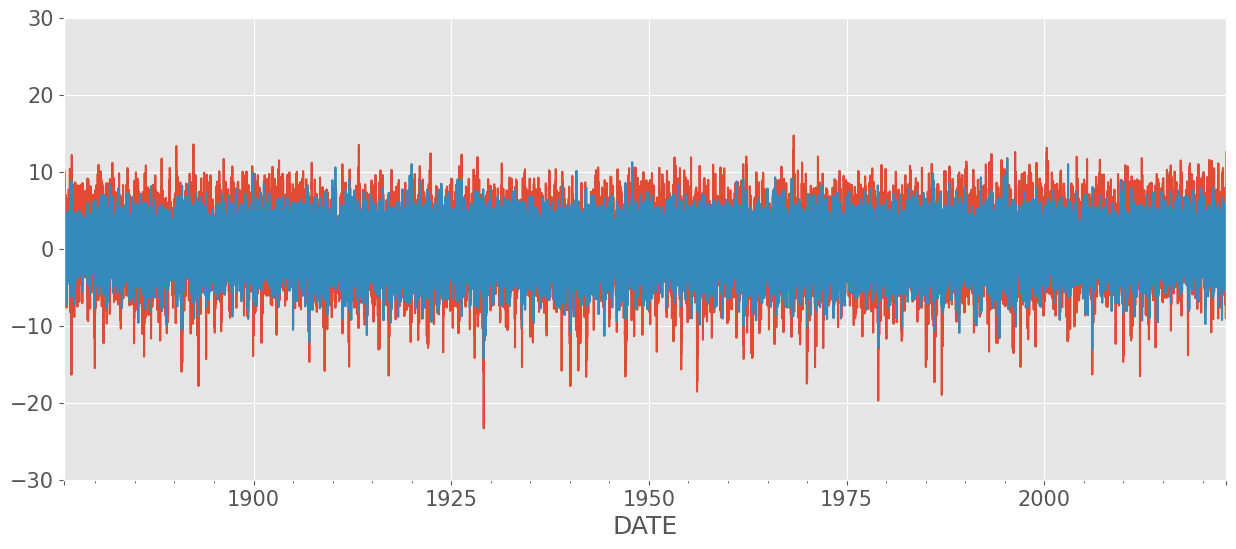

In [150]:
# Is the remainder prediction error smaller than the remainder itself?
df_rem['remainder'].plot(ylim=[-30,30])
(df_rem['remainder'] - df_rem['predictions_ar1']).plot(ylim=[-30,30]);

In [151]:
### Should we add another lag (lag2)?

In [152]:
df_rem['lag2'] = df_rem['remainder'].shift(2)
df_rem['lag3'] = df_rem['remainder'].shift(3)

df_rem.head()

remainder      lag1  predictions_ar1      lag2      lag3
DATE                                                                
1876-01-02   3.382438  3.082471         2.478118       NaN       NaN
1876-01-03   1.182404  3.382438         2.719259       NaN       NaN
1876-01-04  -4.917630  1.182404         0.950660  3.382438       NaN
1876-01-05  -8.917664 -4.917630        -3.953134  1.182404  3.382438
1876-01-06  -6.817698 -8.917664        -7.168747 -4.917630  1.182404

In [153]:
round(df_rem[['remainder', 'lag1', 'lag2','lag3']].corr(), 2)

remainder  lag1  lag2  lag3
remainder       1.00   0.8   0.6  0.46
lag1            0.80   1.0   0.8  0.60
lag2            0.60   0.8   1.0  0.80
lag3            0.46   0.6   0.8  1.00

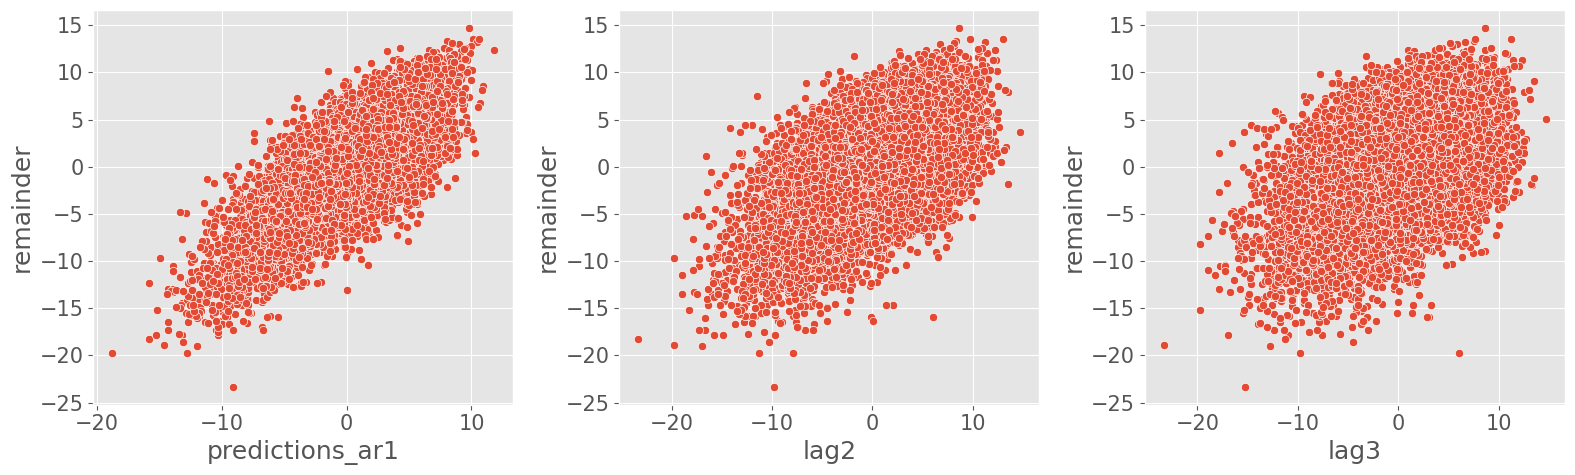

In [154]:
import matplotlib.gridspec as gridspec
#sns.set() # set seaborn as default style
p=3
lag_columns = df_rem.columns[-p:]
fig, axes = plt.subplots(1,p, figsize=(16,5),dpi=100)
gs = gridspec.GridSpec(1,p)

for i in range(p):
    sns.scatterplot(x=df_rem[lag_columns[i]],y=df_rem['remainder'],ax=axes[i])
    
plt.tight_layout()

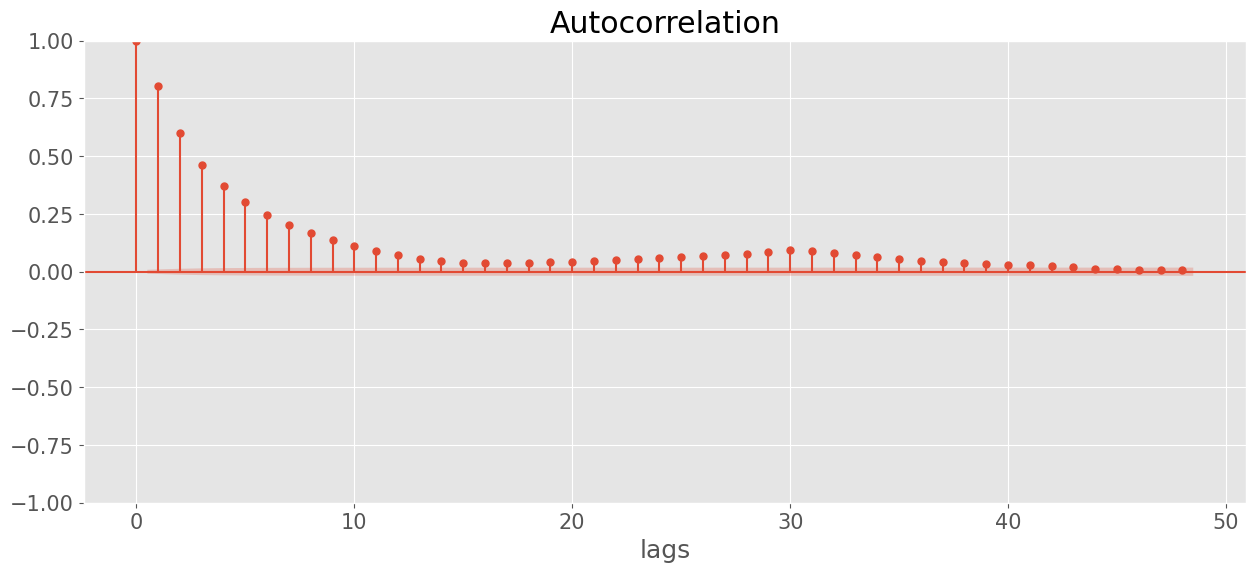

In [155]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_rem['remainder'])
plt.xlabel('lags');

In [157]:
# white noise or random noise
import numpy as np
random_array = np.random.normal(loc=0, scale=10, size=53690)
df_rem['random'] = random_array

<AxesSubplot: xlabel='DATE'>

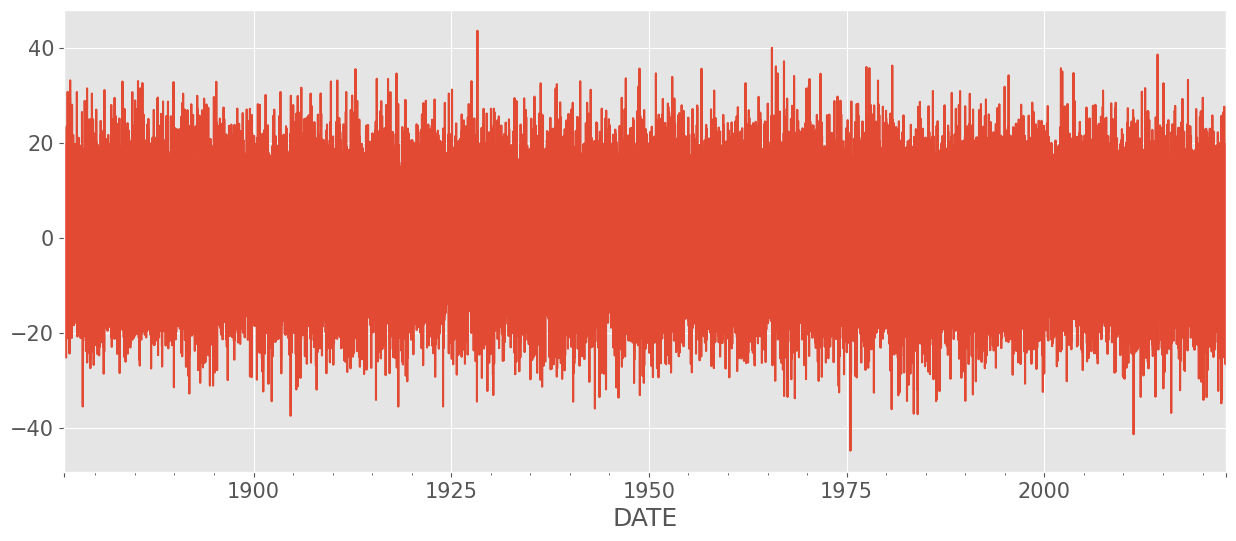

In [158]:
df_rem['random'].plot()

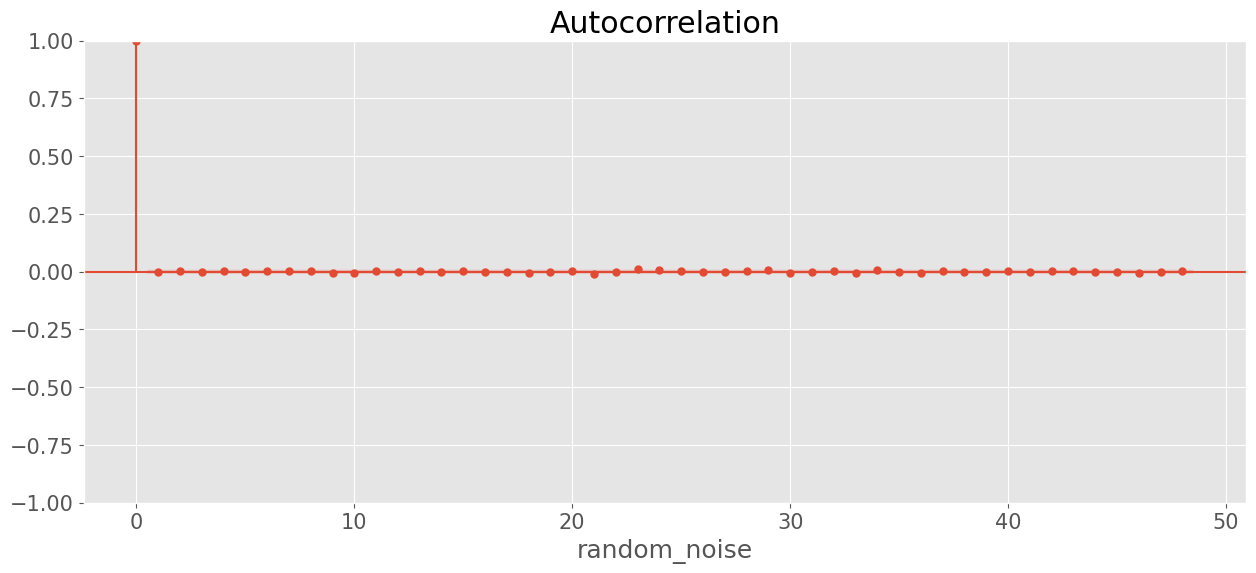

In [159]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df_rem['random'])
plt.xlabel('random_noise');

In [160]:
### Determine _Partial_ Autocorrelation

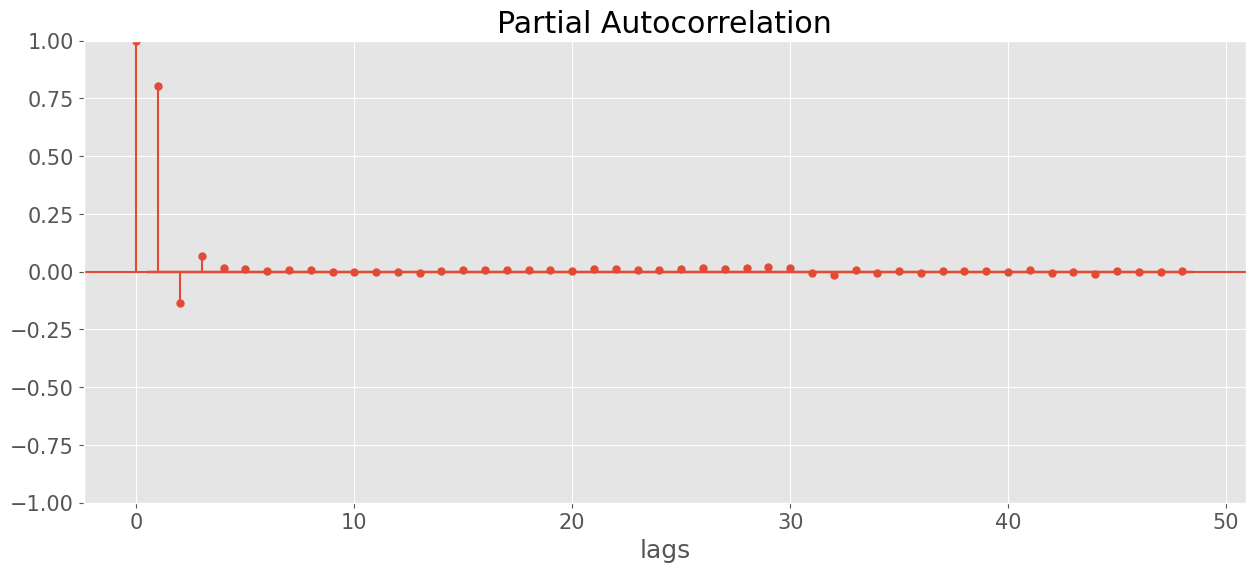

In [161]:
# Statsmodels provides a function called plot_pacf
# plot partial autocorrelation function
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_rem['remainder'])
plt.xlabel('lags');

In [162]:
from statsmodels.tsa.ar_model import ar_select_order
lags_order = ar_select_order(df_rem['remainder'], maxlag=5)

In [163]:
lags_order.ar_lags

[1, 2, 3, 4]

In [164]:
lags_order.bic

{(1, 2, 3, 4): 242192.7197566528,
 (1, 2, 3, 4, 5): 242193.25383531107,
 (1, 2, 3): 242195.95790141032,
 (1, 2): 242447.91395131653,
 (1,): 243401.54224840814,
 0: 299161.47394927527}

### OLS Regression

#### on Xtrain_tran

In [ ]:
# Create a list of features
forward_features = []

# Original features
feature_list = Xtrain_tran.columns

In [ ]:
feature_list

In [ ]:
possible_models = pd.DataFrame(columns=['features', 'p', 'r2'])
# Run a linear regression separately on each of the features

In [ ]:
while len(feature_list) > 0:
    forward_selection = pd.DataFrame(columns=['features', 'p', 'r2'])
    for feature in feature_list:
        m_feature = OLS(ytrain, Xtrain_tran[forward_features + [feature]])
#         print(forward_features + [feature])
        result = m_feature.fit()
#         print(result.summary())
        forward_selection = forward_selection.append({
                                    'feature': feature
                                  , 'features': forward_features + [feature]
                                  , 'p': result.pvalues.loc[feature]
                                  , 'r2': result.rsquared}
                                  , ignore_index=True)

    # p > 0.05 -> not significant
    # p <= 0.05 significant
    # p <= 0.01 very significant
    # p <= 0.001 highly significant

    if forward_selection.sort_values('p').iloc[0].p < 0.05:
        print(forward_selection.sort_values('p').iloc[0].features)
        best_feature = forward_selection.sort_values('p').iloc[0].feature
        forward_features.append(best_feature)
        feature_list = feature_list.drop(best_feature)
        best_model = forward_selection[forward_selection['feature']==best_feature]
        possible_models = possible_models.append(best_model, ignore_index=True)

    else:
        break

In [ ]:
result.summary()